In [1]:
# mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy repository.
# %cp -r /content/drive/MyDrive/IEEE_Access/code/yolov9_udp /content/yolov9_udp

In [ ]:
# Checking GPU.
!nvidia-smi

Mon Jun 24 08:05:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Copy dataset from google drive.
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/val
!cp /content/drive/MyDrive/IEEE_Access/dataset/train.zip /content/data/train.zip
!cp /content/drive/MyDrive/IEEE_Access/dataset/val.zip   /content/data/val.zip
!unzip /content/data/train.zip -d /content/data/train
!unzip /content/data/val.zip   -d /content/data/val

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/3_122400.jpg  
  inflating: /content/data/train/3_122400.txt  
  inflating: /content/data/train/3_122430.jpg  
  inflating: /content/data/train/3_122430.txt  
  inflating: /content/data/train/3_122460.jpg  
  inflating: /content/data/train/3_122460.txt  
  inflating: /content/data/train/3_122490.jpg  
  inflating: /content/data/train/3_122490.txt  
  inflating: /content/data/train/3_122520.jpg  
 extracting: /content/data/train/3_122520.txt  
  inflating: /content/data/train/3_122550.jpg  
  inflating: /content/data/train/3_122550.txt  
  inflating: /content/data/train/3_122730.jpg  
  inflating: /content/data/train/3_122730.txt  
  inflating: /content/data/train/3_122760.jpg  
  inflating: /content/data/train/3_122760.txt  
  inflating: /content/data/train/3_122790.jpg  
  inflating: /content/data/train/3_122790.txt  
  inflating: /content/data/train/3_122820.jpg  
  inflating: /content/data/train/3_12

In [ ]:
# install requirements
!pip install -r /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.6 MB/s eta 0:00:00


In [ ]:
# Download model weights
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P ./weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

## Detection test

### gelan-c

In [ ]:
!python /content/yolov9_udp/detect.py --weights /content/weights/gelan-c.pt --conf 0.1 --source /content/data/val/4_000900.jpg # --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/val/4_000900.jpg, data=yolov9_udp/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9_udp/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2024-4-24 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 387 layers, 25288768 parameters, 0 gradients, 102.1 GFLOPs
image 1/1 /content/data/val/4_000900.jpg: 640x640 2 persons, 1 train, 1 backpack, 1 handbag, 1 tv, 50.6ms
Speed: 0.5ms pre-process, 50.6ms inference, 730.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9_udp/runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9_udp/runs/detect/exp3/4_000900.jpg", width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov9_udp/runs/detect/exp3/4_000900.jpg'

## Train Model

In [ ]:
pwd

'/content'

In [ ]:
!python /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/train.py \
--batch 70 --epochs 60 --img 320 --device 0 --min-items 0 --close-mosaic 15 \
--data     /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/data/udp_yaml \
--weights  /content/weights/gelan-c.pt \
--cfg      /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/models/detect/udp_gelan-c.yaml \
--hyp      /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/data/hyps/udp.yaml \
--project  /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/train/20240624 \
--save-period 1

# !python /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/train.py --resume /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/train/weights/last.pt

2024-06-24 08:30:16.313426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 08:30:16.313496: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 08:30:16.315023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 08:30:16.322857: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 08:30:17.538070: W tensorflow/comp

In [ ]:
# !cp -r /content/yolov9_udp/runs/train/exp3 /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs

## Examine Training Results

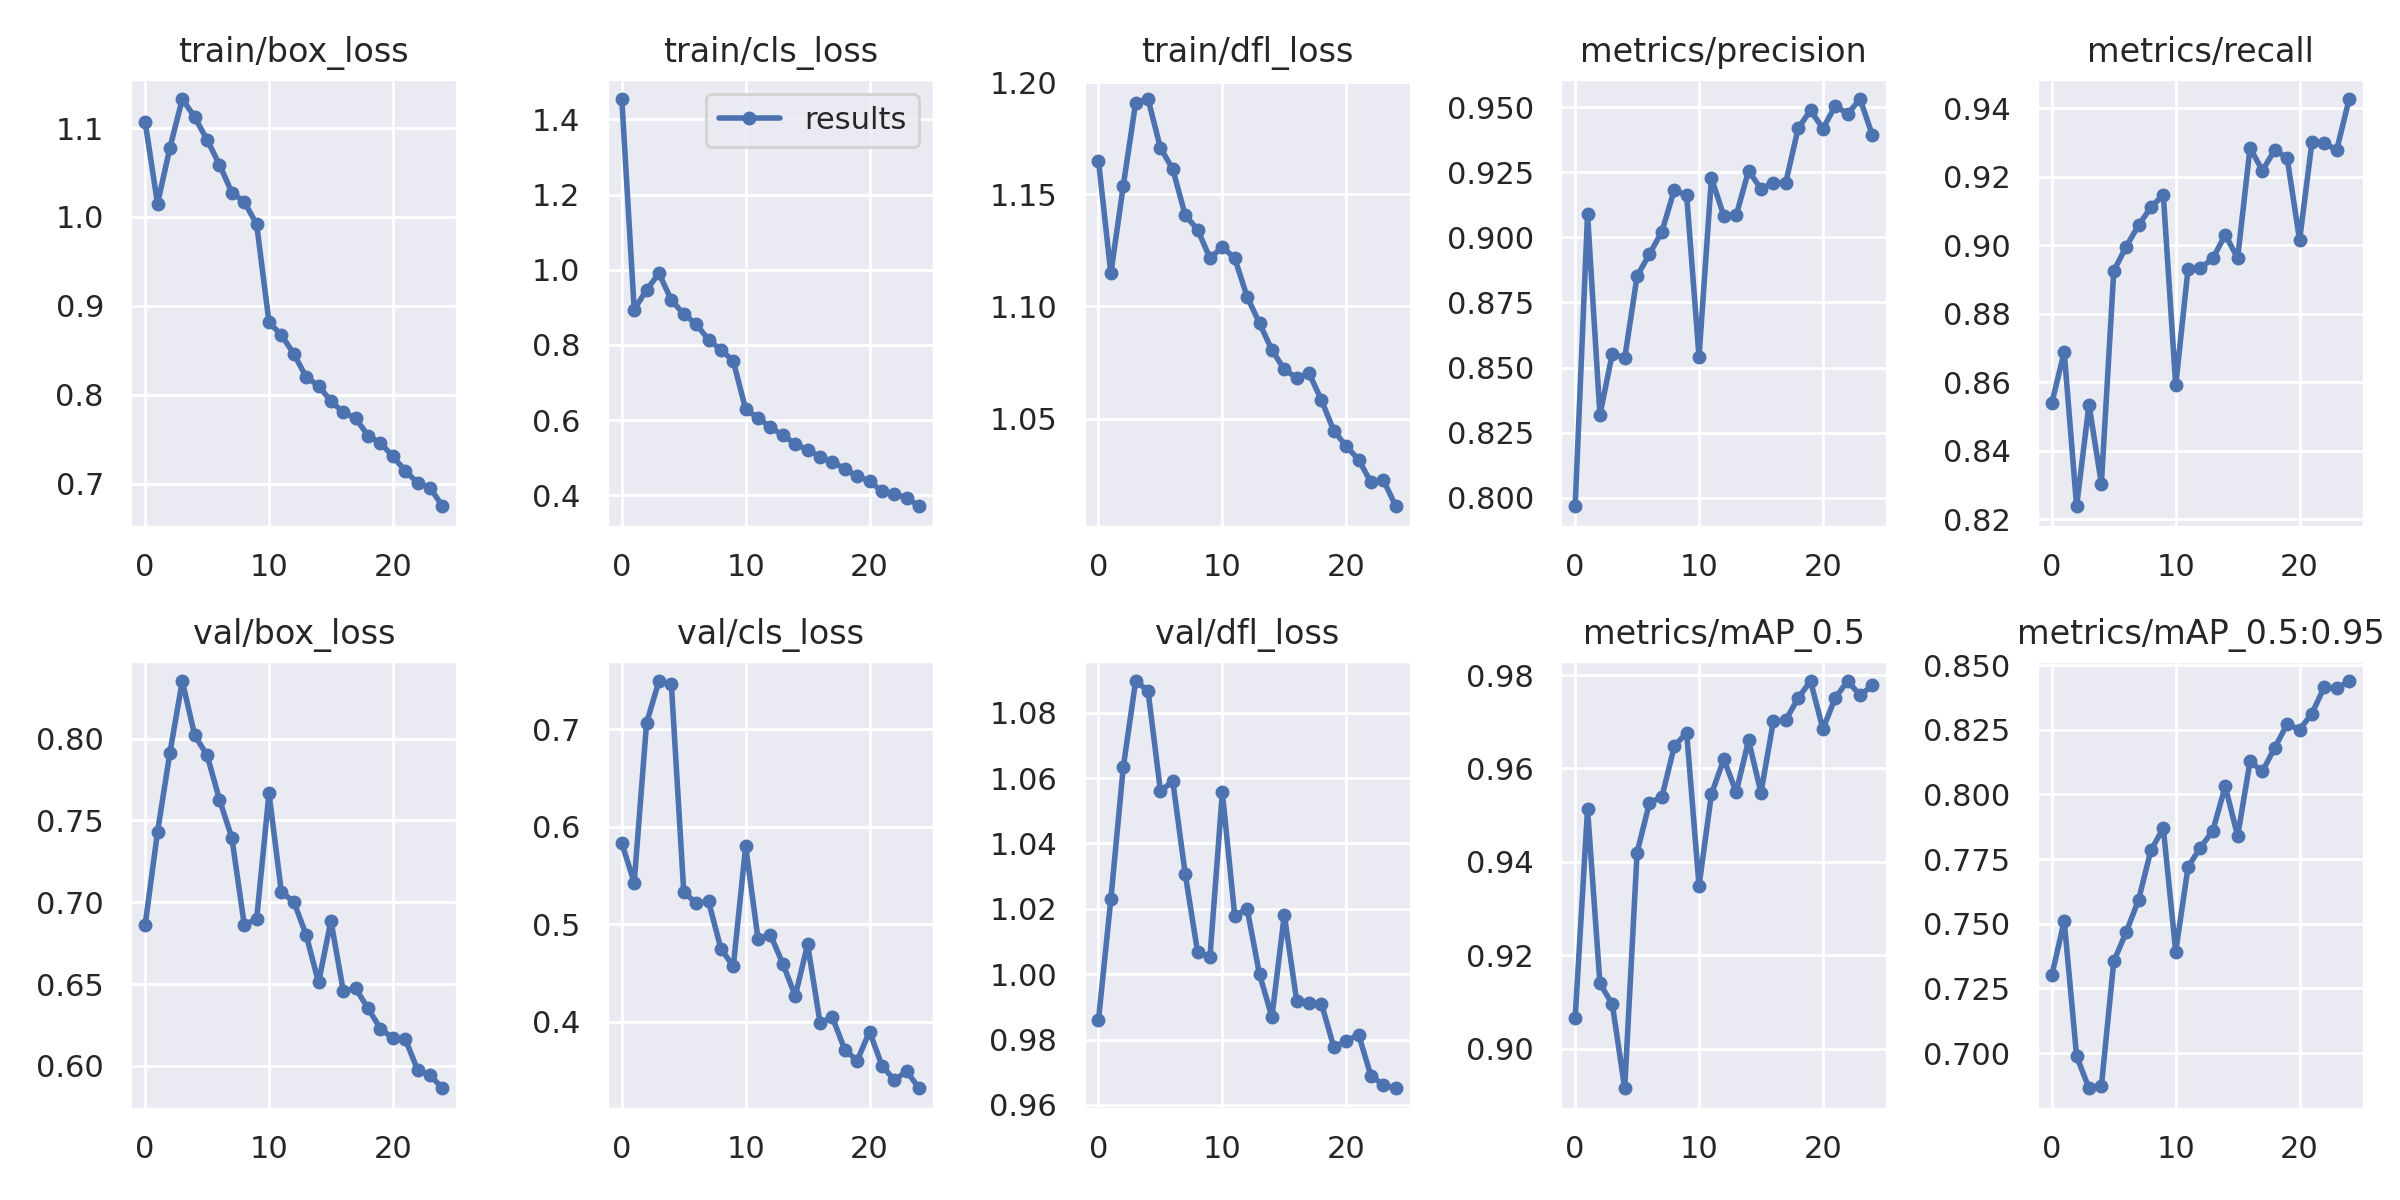

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/exp3/results.png", width=1000)

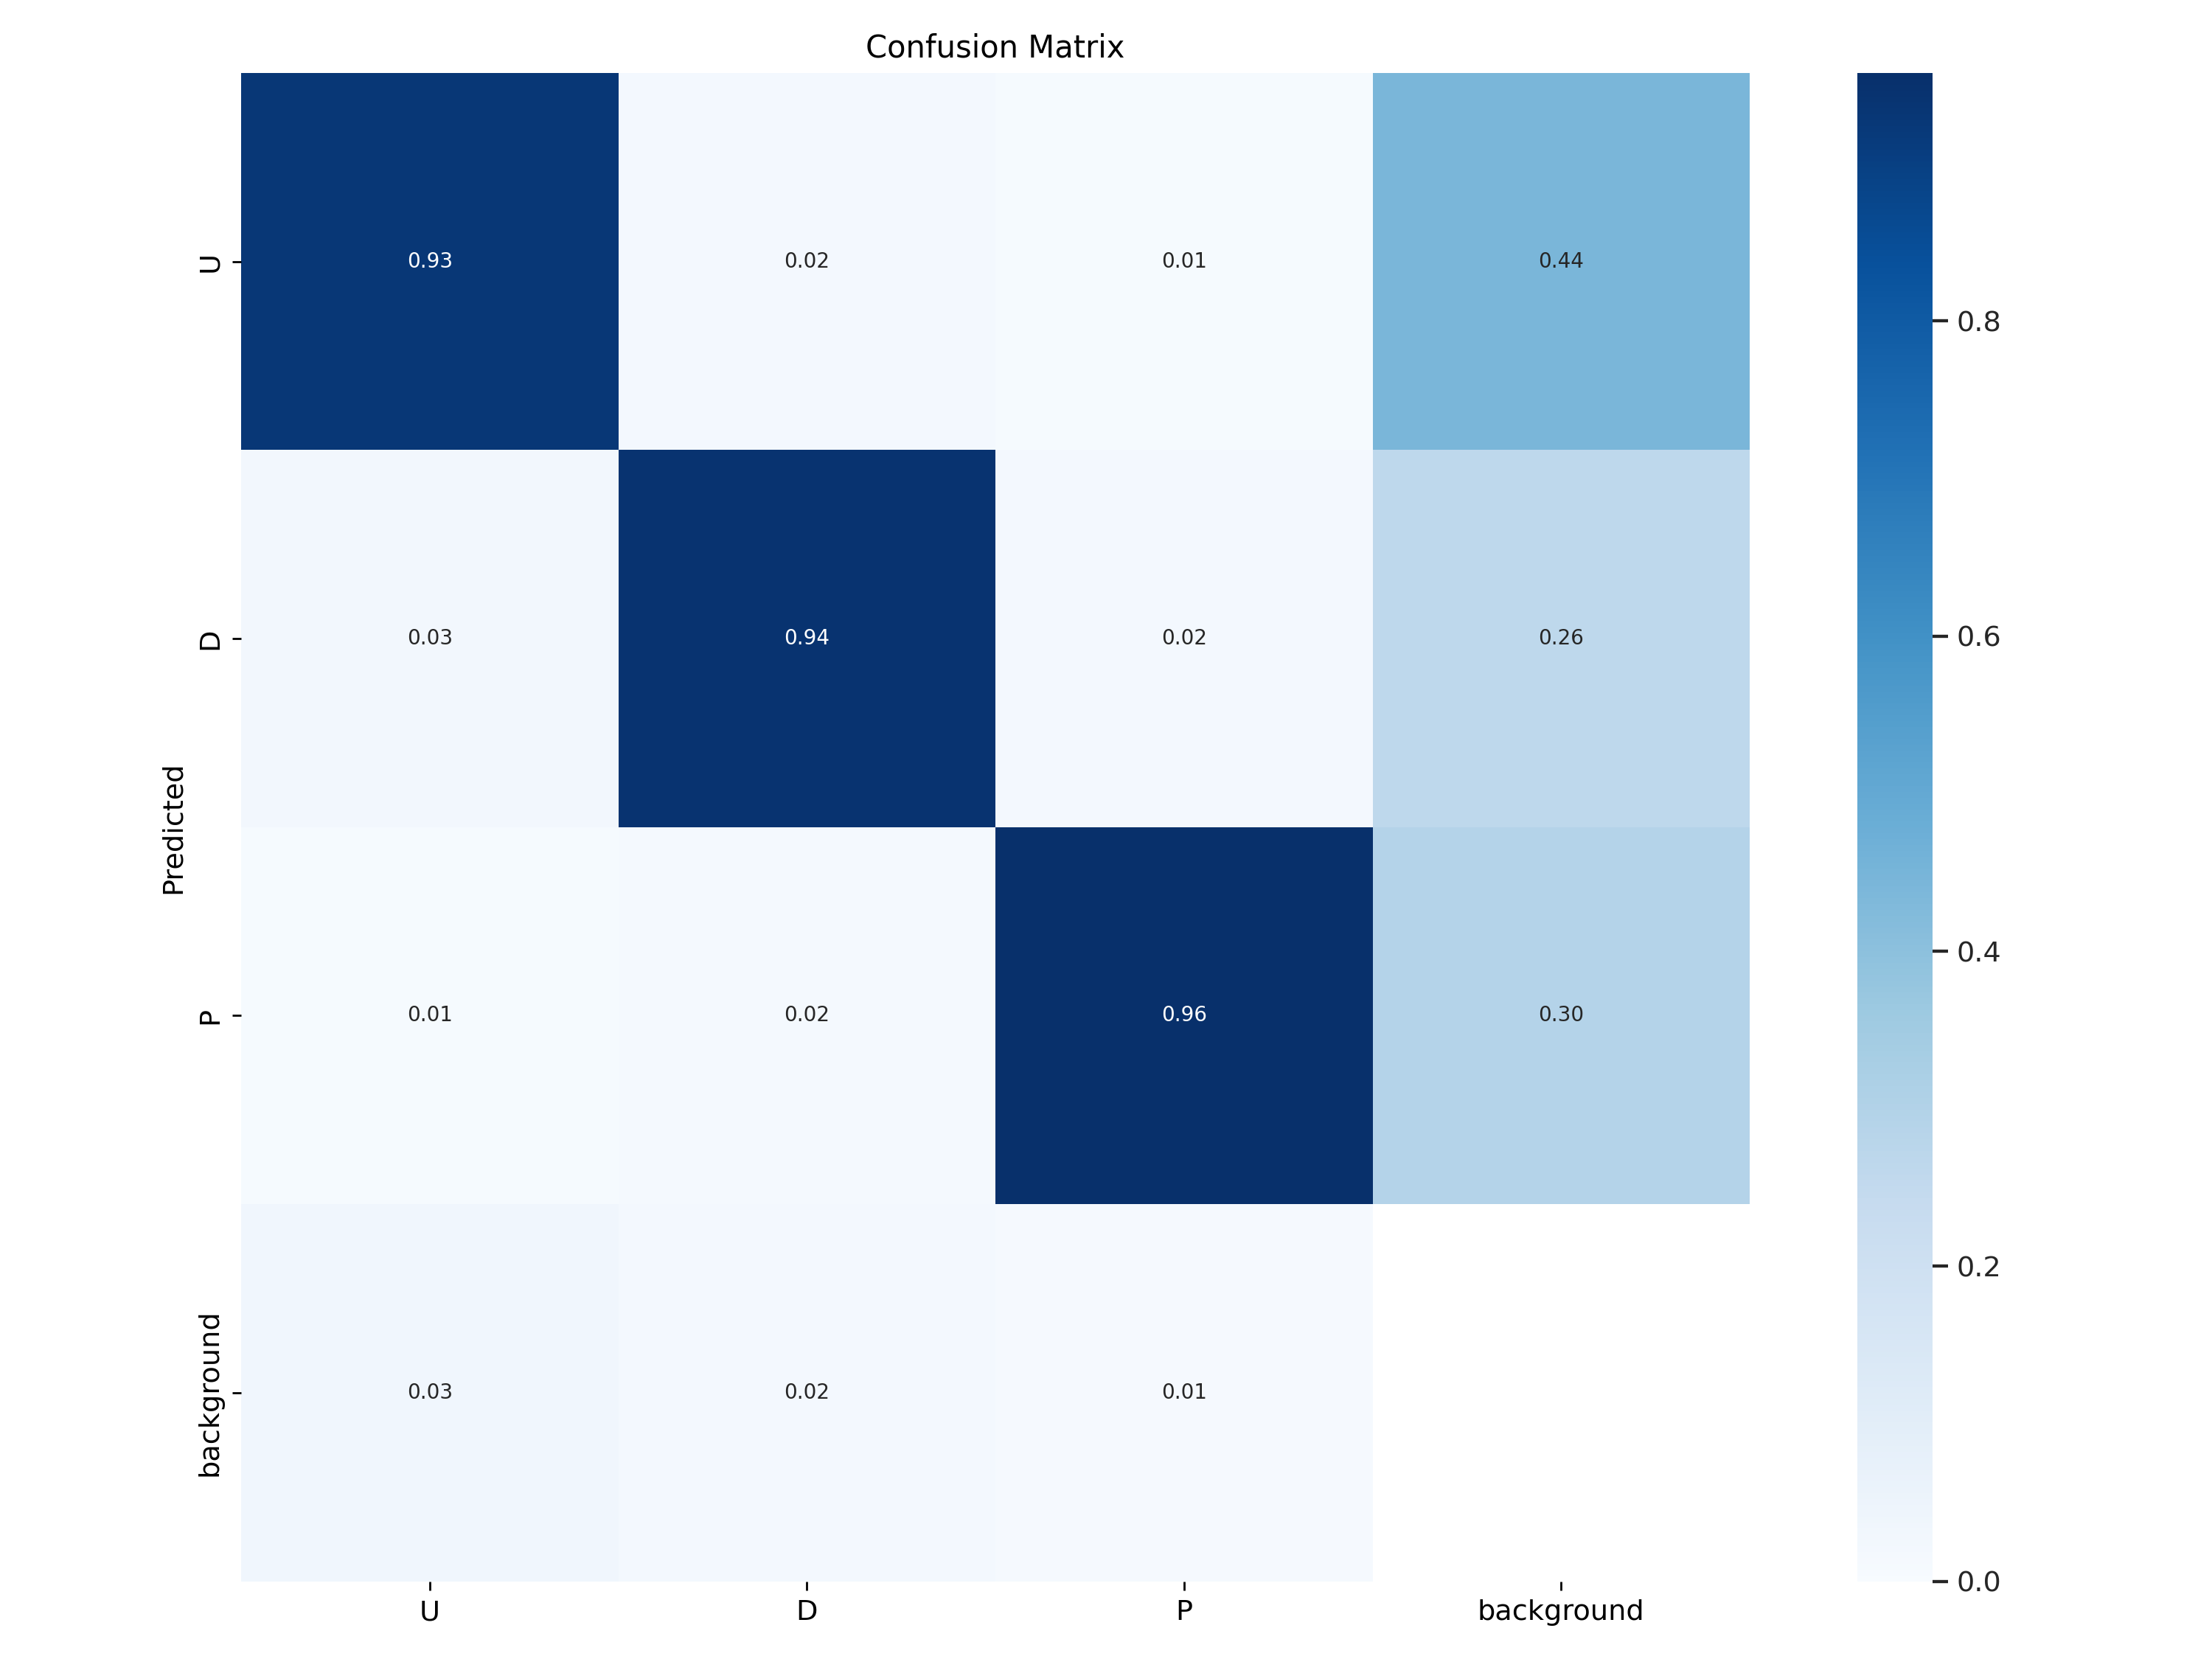

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/exp3/confusion_matrix.png", width=1000)

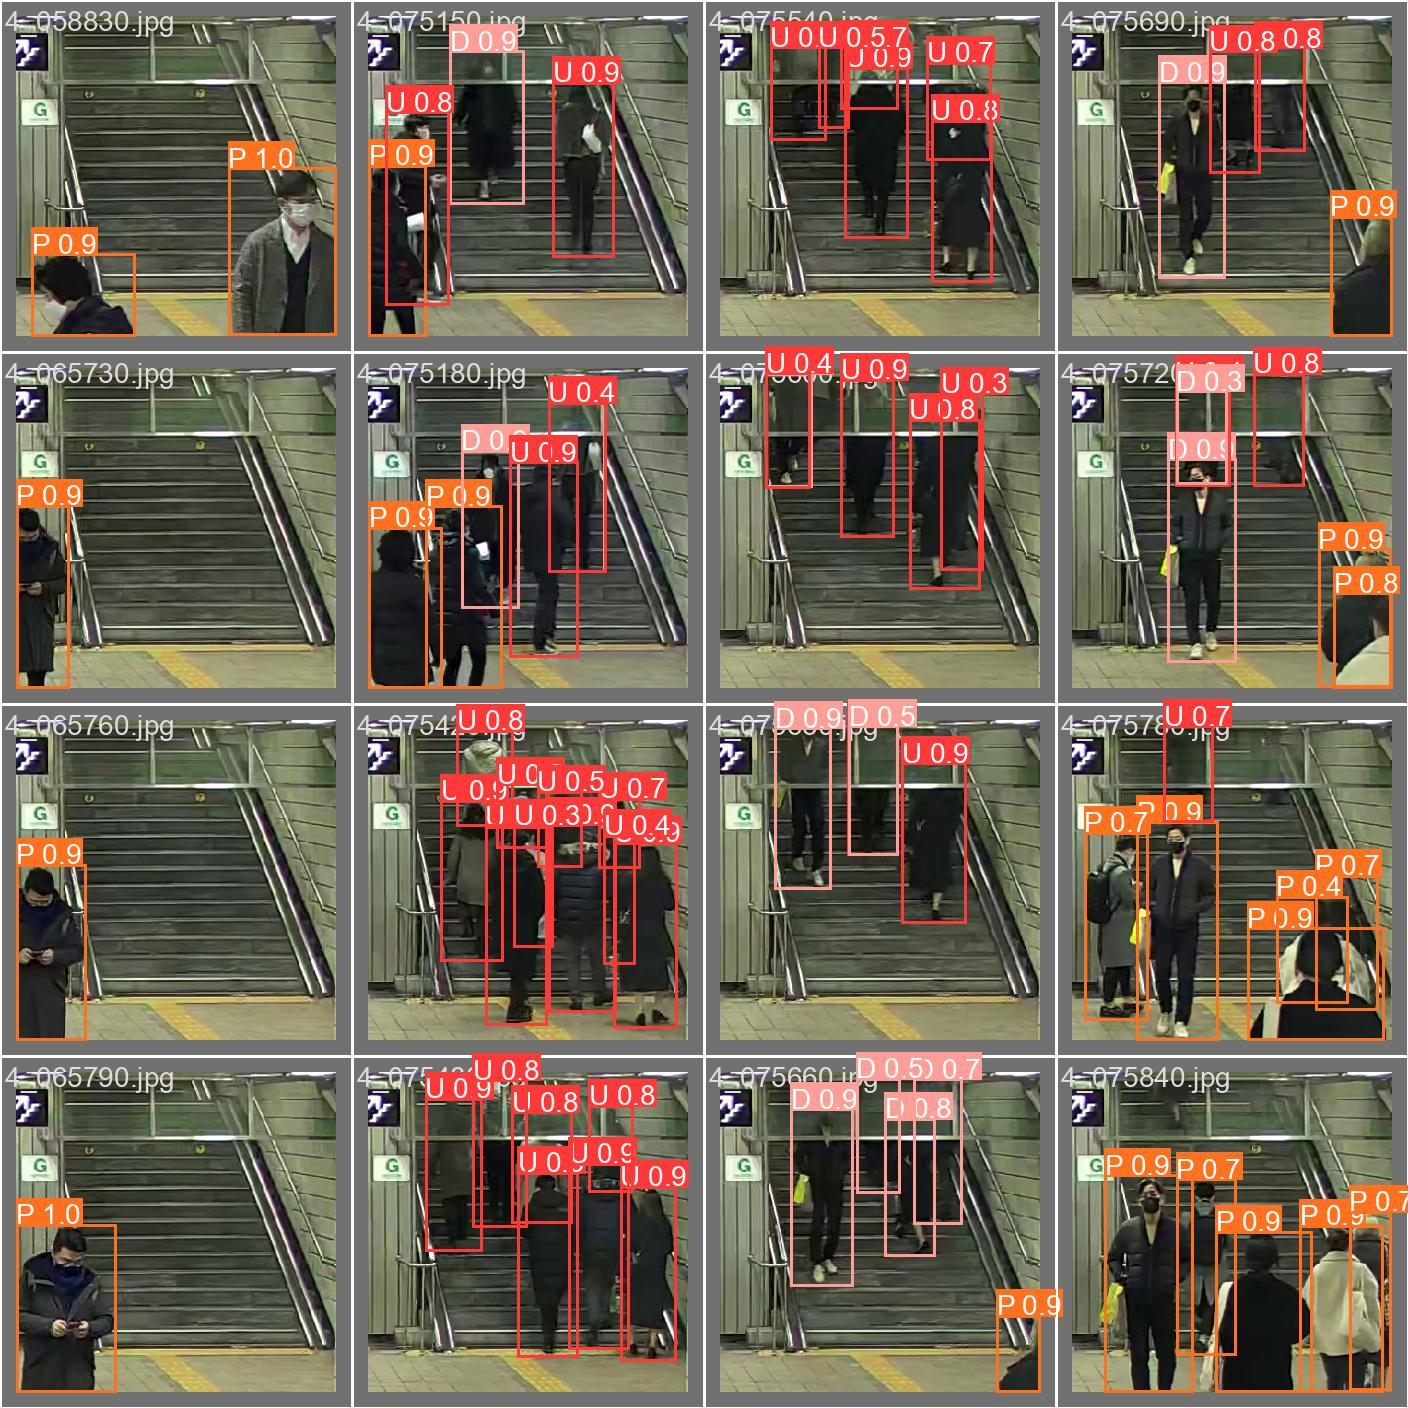

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/exp3/val_batch2_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
!python /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/val.py \
--img 320 --batch 32 --conf 0.001 --device 0 \
--data /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/data/udp_yaml \
--weights /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/train/weights/best.pt

val: data=/content/drive/MyDrive/IEEE_Access/code/yolov9_udp/data/udp_yaml, weights=['/content/drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/train/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 2024-4-20 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 387 layers, 25229401 parameters, 0 gradients, 101.8 GFLOPs
100% 755k/755k [00:00<00:00, 22.0MB/s]
val: Scanning /content/data/val... 1086 images, 0 backgrounds, 0 corrupt: 100% 1086/1086 [00:00<00:00, 1557.84it/s]
val: New cache created: /content/data/val.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 34/34 [00:22<00:00,  1.

## Inference with Custom Model

In [ ]:
# v7
!python /content/drive/MyDrive/IEEE_Access/code/yolov7_udp/detect.py \
--img 320 --conf 0.001 --device 0\
--weights /content/drive/MyDrive/IEEE_Access/code/weights/gelan-c_40min_25.3M/weights/best_striped.pt \
--source /content/data/val \
--save-txt \
--save-conf \
--nosave

Namespace(weights=['/content/drive/MyDrive/IEEE_Access/code/weights/gelan-c_40min_25.3M/weights/best_striped.pt'], source='/content/data/val', img_size=320, conf_thres=0.001, iou_thres=0.45, device='0', view_img=False, save_txt=True, save_conf=True, nosave=True, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 2024-4-27 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Traceback (most recent call last):
  File "/content/drive/MyDrive/IEEE_Access/code/yolov7_udp/detect.py", line 196, in <module>
    detect()
  File "/content/drive/MyDrive/IEEE_Access/code/yolov7_udp/detect.py", line 34, in detect
    model = attempt_load(weights, map_location=device)  # load FP32 model
  File "/content/drive/MyDrive/IEEE_Access/code/yolov7_udp/models/experimental.py", line 252, in attempt_load
    ckpt = torch.load(w, map_location=map_location)  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serializa

In [ ]:
# v7 Lite
!python /content/drive/MyDrive/IEEE_Access/code/yolov7_udp/detect.py \
--img 320 --conf 0.001 --device 0\
--weights /content/drive/MyDrive/IEEE_Access/code/yolov7_udp/runs/train/exp2/weights/best.pt \
--source /content/data/train \
--save-txt \
--save-conf \
--nosave

Streaming output truncated to the last 5000 lines.
9 Us, 23 Ds, 93 Ps, Done. (6.3ms) Inference, (1.7ms) NMS
10 Us, 24 Ds, 101 Ps, Done. (4.7ms) Inference, (1.3ms) NMS
11 Us, 24 Ds, 102 Ps, Done. (4.1ms) Inference, (1.1ms) NMS
14 Us, 26 Ds, 100 Ps, Done. (4.1ms) Inference, (1.1ms) NMS
12 Us, 23 Ds, 101 Ps, Done. (4.0ms) Inference, (1.1ms) NMS
12 Us, 26 Ds, 103 Ps, Done. (4.3ms) Inference, (1.1ms) NMS
12 Us, 25 Ds, 101 Ps, Done. (4.2ms) Inference, (1.1ms) NMS
16 Us, 25 Ds, 101 Ps, Done. (4.8ms) Inference, (1.4ms) NMS
13 Us, 27 Ds, 102 Ps, Done. (4.5ms) Inference, (1.5ms) NMS
14 Us, 23 Ds, 105 Ps, Done. (4.1ms) Inference, (1.1ms) NMS
14 Us, 22 Ds, 101 Ps, Done. (4.4ms) Inference, (1.1ms) NMS
14 Us, 24 Ds, 98 Ps, Done. (4.2ms) Inference, (1.1ms) NMS
16 Us, 27 Ds, 96 Ps, Done. (4.2ms) Inference, (1.2ms) NMS
6 Us, 27 Ds, 86 Ps, Done. (4.2ms) Inference, (1.1ms) NMS
5 Us, 20 Ds, 87 Ps, Done. (3.9ms) Inference, (1.1ms) NMS
8 Us, 20 Ds, 95 Ps, Done. (3.9ms) Inference, (1.1ms) NMS
8 Us, 21 Ds, 94

In [ ]:
# v9
!python /content/drive/MyDrive/IEEE_Access/code/yolov9_udp/detect.py \
--img 320 --conf 0.001 --device 0\
--weights /content/drive/MyDrive/IEEE_Access/code/weights/v9/weights/best.pt \
--source /content/data/train \
--save-txt \
--save-conf

detect: weights=['/content/drive/MyDrive/IEEE_Access/code/weights/v9/weights/best.pt'], source=/content/data/train, data=drive/MyDrive/IEEE_Access/code/yolov9_udp/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.001, iou_thres=0.7, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/IEEE_Access/code/yolov9_udp/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 2024-4-20 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 387 layers, 25229401 parameters, 0 gradients, 101.8 GFLOPs
image 1/5292 /content/data/train/1_007080.jpg: 320x320 1 U, 21.9ms
image 2/5292 /content/data/train/1_007110.jpg: 320x320 1 U, 1 D, 21.9ms
image 3/5292 /content/data/train/1_007140.jpg: 320x320 1 U, 1 D, 21.9ms
image 4/5292 /content/da

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [ ]:
!pip install -q inference supervision

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)



In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/6
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/model/6


**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).




In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

··········


**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.

In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.

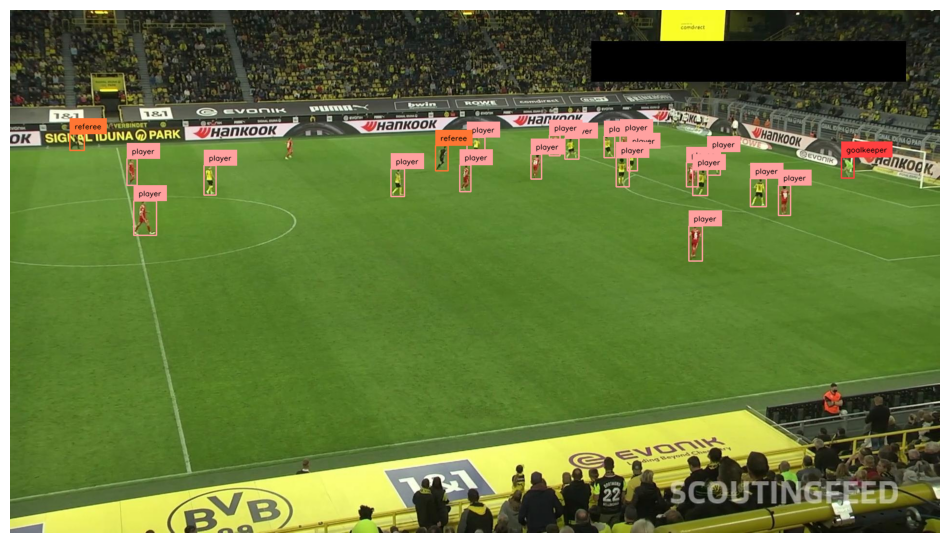

In [ ]:
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
bounding_box_annotator = sv.BoundingBoxAnnotator()

annotated_image = image.copy()
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)